# 머신러닝 상품화 - 여정2
## # Data Cleansing & Feature Engineering

- 기초통계 및 시각화
- Feature Selection (FI, Step-Wise, 상관계수 등)
- Feature Reduction (변수 합성)
- Last Feature Engineering

In [59]:
# python 3.11
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

import os

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

base_path = os.getcwd()

In [2]:
df = pd.read_csv(base_path + "/data/german_credit_risk_data.csv", sep=";")
target_column = "Creditability"

df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


### 1. 기초통계 및 시각화

- Data Summary
- Noise Data 식별
- Anomaly Data 식별
- 누락 Data 식별

In [3]:
# categorical and numeric columns
rsts = []
for column_name in list(df.columns):
    rsts.append([column_name, df[column_name].dtype, len(df[column_name].unique())])

info = pd.DataFrame(rsts, columns=['col_name','type','unique_cnt'])
info

,col_name,type,unique_cnt
0,Creditability,int64,2
1,Account_Balance,int64,4
2,Duration_of_Credit_monthly,int64,33
3,Payment_Status_of_Previous_Credit,int64,5
4,Purpose,int64,10
5,Credit_Amount,int64,923
6,Value_Savings_Stocks,int64,5
7,Length_of_current_employment,int64,5
8,Instalment_per_cent,int64,4
9,Sex_Marital_Status,int64,4


In [4]:
# credit 데이터의 categoriacl data 기준
k = 10
list_numeircal_column = list(info.loc[info['unique_cnt']>k,'col_name'])
list_categorical_column = [x for x in df.columns if (x not in list_numeircal_column)&(x!=target_column)]
for column_name in list_categorical_column:
  df[column_name] = df[column_name].astype("object")

print('# categorical data 기준 :', k)
print('numerical data: ', list_numeircal_column)
print('categorical data: ', list_categorical_column)

# categorical data 기준 : 10
numerical data:  ['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years']
categorical data:  ['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']


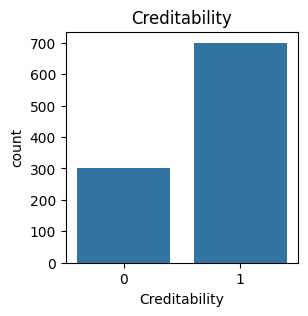

In [5]:
# 종속변수 시각화
plt.figure(figsize=(3,3))
plt.title(target_column)

sns.countplot(x=target_column, data=df)
plt.show()

In [6]:
# 독립변수 - categorical data
# plt.figure(figsize=(20,20))
# x = 1
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
# for column_name in list_categorical_column:
#     if(column_name==target_column):continue
#     plt.subplot(5,4,x)
#     x = x+1
#     df[column_name].value_counts().sort_index().plot(kind='bar')
#     plt.title(column_name)
# plt.show()

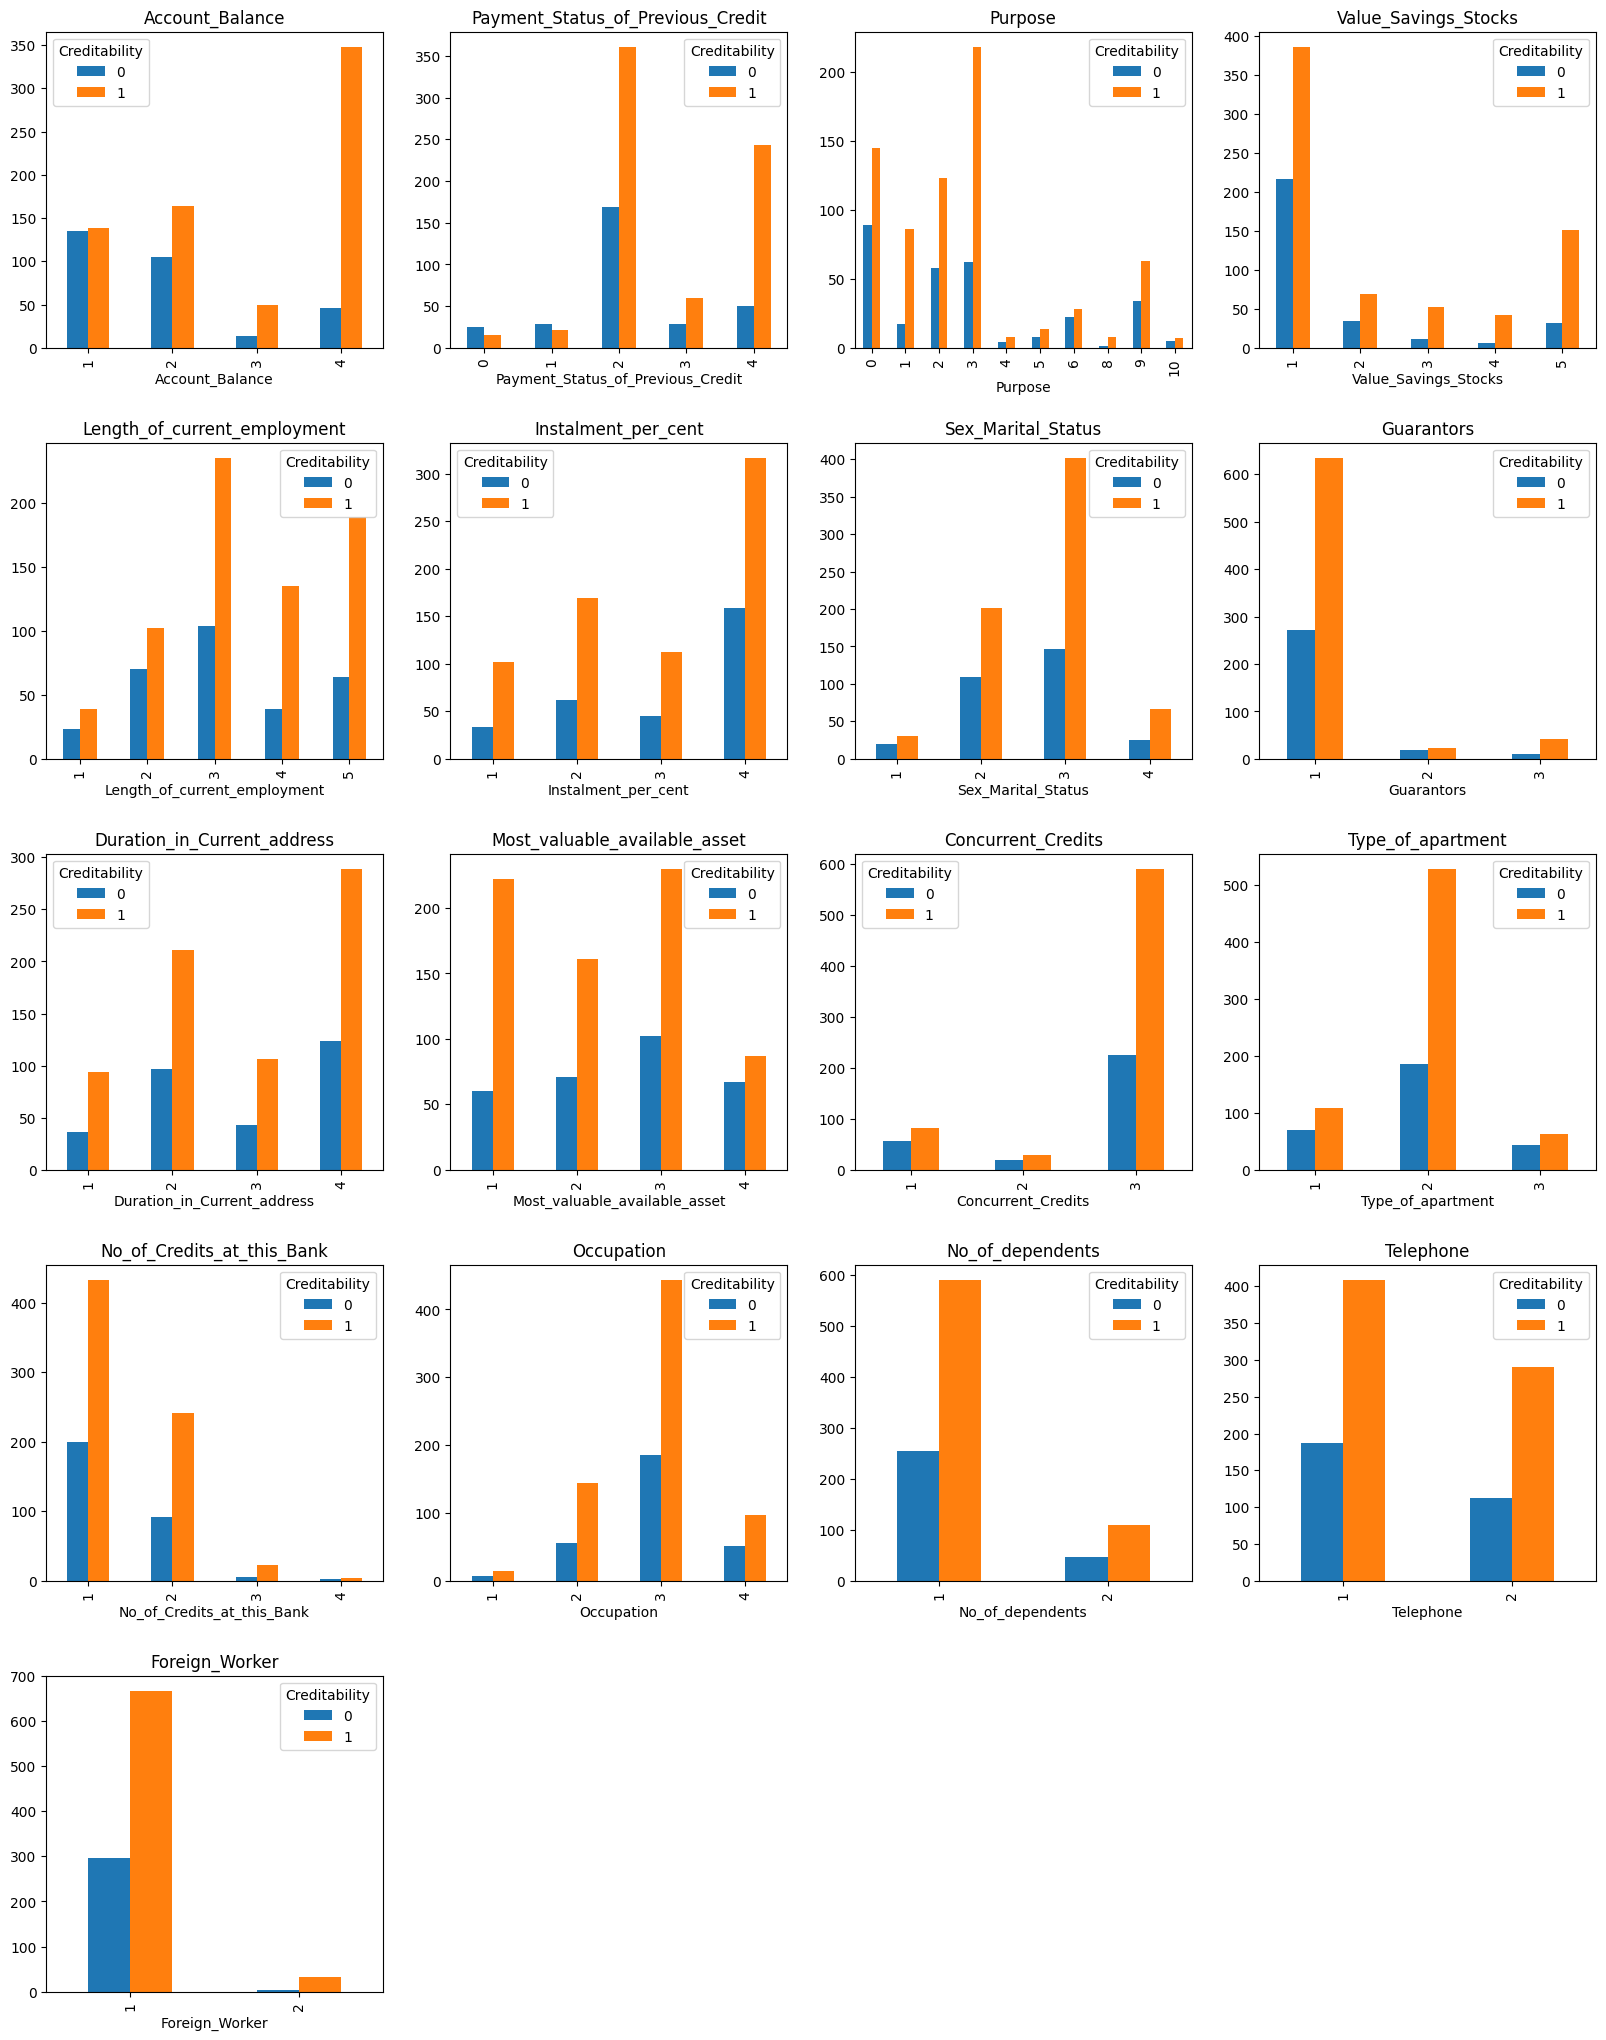

In [7]:
# 독립변수 - categorical data with target
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for column_name in list_categorical_column:
    if(column_name==target_column):continue
    tmp_ax = plt.subplot(5,4,x)
    x = x+1
    tmp_df = df[[target_column,column_name]].groupby(by=[target_column,column_name], as_index=False).value_counts()
    tmp_df = tmp_df.pivot(index=column_name, columns=target_column, values='count')
    tmp_df.plot.bar(ax=tmp_ax)
    plt.title(column_name)

plt.show()

In [8]:
# 독립변수 - Numerical Data
df[list_numeircal_column].describe()

,Duration_of_Credit_monthly,Credit_Amount,Age_years
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


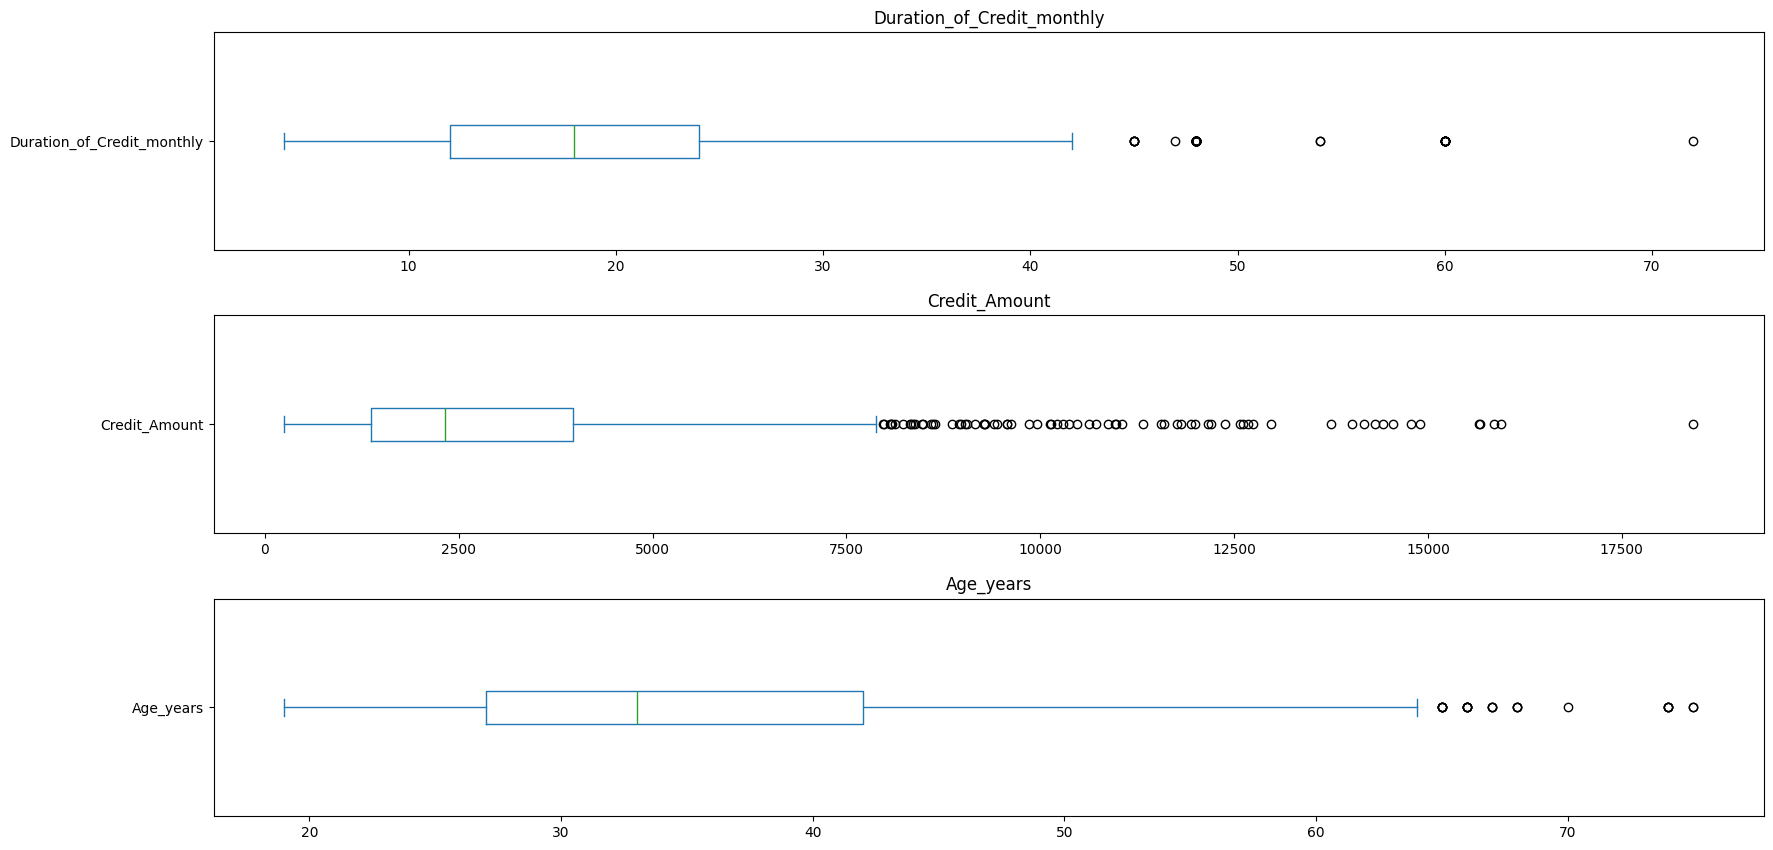

In [9]:
# 독립변수 - Numerical Data
plt.figure(figsize=(20,8))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for column_name in list_numeircal_column:
    plt.subplot(3,1,x)
    x = x+1
    df[column_name].plot(kind='box', vert=False)
    plt.title(column_name)

plt.show()

### 2. Feature Selection - 상관계수 
- 두 변수 간의 선형관계의 강도와 방향을 나타내는 값
- 시각화를 통해 선형 이외의 관계를 갖는지도 확인 (지수, 로그, 역수, 2차, 3차 등)

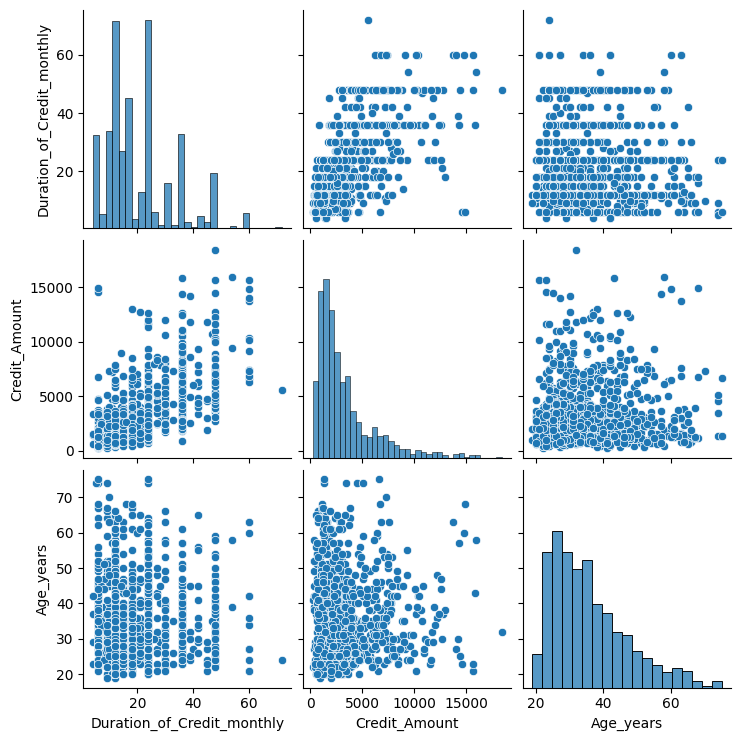

In [10]:
sns.pairplot(data=df.loc[:, list_numeircal_column])

In [11]:
df[list_numeircal_column+[target_column]].corr()

,Duration_of_Credit_monthly,Credit_Amount,Age_years,Creditability
Duration_of_Credit_monthly,1.000000,0.624988,-0.037550,-0.214927
Credit_Amount,0.624988,1.000000,0.032273,-0.154740
Age_years,-0.037550,0.032273,1.000000,0.091272
Creditability,-0.214927,-0.154740,0.091272,1.000000


In [12]:
df[list_numeircal_column+[target_column]].corr()[target_column]

Duration_of_Credit_monthly   -0.214927
Credit_Amount                -0.154740
Age_years                     0.091272
Creditability                 1.000000
Name: Creditability, dtype: float64

### 2. Feature Selection - 통계검정

- target이 명목형일 경우 검정을 통해 독립변수와의 관계를 확인할 수 있음
- Chi-square test (독립성 검정) - Categorical
- ANOVA (or Kruskal Wallis) - Numerical

# 독립성 검정
- 두 확률이 독립일 경우, P(A n B) = P(A) x P(B)의 성립을 전제로 검정
- 확률변수 X는 대략적으로 실제값과 기대값의 차이에 대한 합이다.


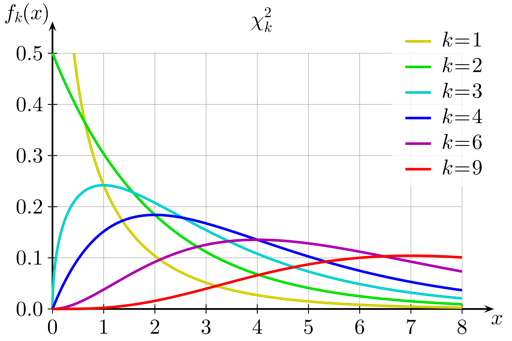

In [57]:
# Chi-square distribution
img = Image.open(base_path + "/data/Chi-square.png")

width, height = img.size
shrinked_image = img.resize((width // 5, height // 5))

print('# 독립성 검정')
print('- 두 확률이 독립일 경우, P(A n B) = P(A) x P(B)의 성립을 전제로 검정')
print('- 확률변수 X는 대략적으로 실제값과 기대값의 차이에 대한 합이다.')
shrinked_image

In [14]:
# 독립성 검정
print('# 귀무가설: 둘은 독립이다.')
print('# 대립가설: 귀무가설은 사실이 아니다.')
tmp_df = pd.crosstab(df["Creditability"], df["Guarantors"])
tmp_df['c_sum'] = tmp_df.sum(axis=1)

print(['g_sum']+list(tmp_df.sum(axis=0)))
tmp_df

# 귀무가설: 둘은 독립이다.
# 대립가설: 귀무가설은 사실이 아니다.
['g_sum', 907, 41, 52, 1000]


Guarantors,1,2,3,c_sum
Creditability,,,,
0,272,18,10,300
1,635,23,42,700


In [15]:
# example
print('# Creditability 0과 Guarantors 1의 확률')
print('{}/{} x {}/{} = {}'.format(300,1000,907,1000, (300/1000)*(907/1000)))

print('\n# Creditability 0과 Guarantors 1의 기대값')
print('{} x {} = {}'.format(1000, 0.2721, 1000*0.2721))

print('\n# Creditability 0과 Guarantors 1의 차이')
print('({}-{})^2 / {} = {}'.format(272,272.1,272.1,round((272-272.1)**2/272.1,6)))

# Creditability 0과 Guarantors 1의 확률
300/1000 x 907/1000 = 0.2721

# Creditability 0과 Guarantors 1의 기대값
1000 x 0.2721 = 272.1

# Creditability 0과 Guarantors 1의 차이
(272-272.1)^2 / 272.1 = 3.7e-05


In [16]:
tmp_rst = []
list_meaningful_column_by_chi = []
for column_name in list_categorical_column:
  if(column_name==target_column):continue
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  tmp_rst.append([column_name, statistic,pvalue])
print("all categorical columns : ", len(list_categorical_column))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

pd.DataFrame(tmp_rst, columns=['col_name','statistics','pvalue'])

all categorical columns :  17
selected columns by chi :  11 ['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Sex_Marital_Status', 'Guarantors', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'Foreign_Worker']


,col_name,statistics,pvalue
0,Account_Balance,123.720944,1.218902e-26
1,Payment_Status_of_Previous_Credit,61.691397,1.279187e-12
2,Purpose,33.356447,1.157491e-04
3,Value_Savings_Stocks,36.098928,2.761214e-07
4,Length_of_current_employment,18.368274,1.045452e-03
5,Instalment_per_cent,5.476792,1.400333e-01
6,Sex_Marital_Status,9.605214,2.223801e-02
7,Guarantors,6.645367,3.605595e-02
8,Duration_in_Current_address,0.749296,8.615521e-01
9,Most_valuable_available_asset,23.719551,2.858442e-05


### 2. Feature Selection - Modeling

- Stepwise Regression: OLS(선형회귀)에 변수를 하나씩 추가하여 적합도(r2)를 비교한 후 feature를 선택해가는 방식
- Feature Importance: 각 feature의 분기에 대해 불순도(Impurity)의 감소분을 평균한 수치
- Impurity: 분기 기준으로 feature 간 특징이 뚜렷해질수록 순수도가 높다고 하는데, 반대로 불순도는 feature 간 특징이 뚜렷하지 않은 정도를 의미하여 값이 클수록 해당 분기 기준이 좋지 않음
- Impurity의 종류: gini index, entropy, variance 등
- gini index 내용 참고: https://blog.naver.com/soowon0109/222561283182

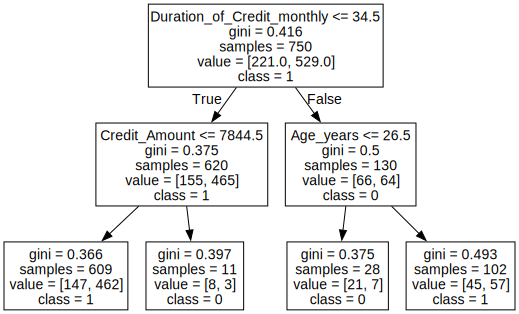

In [36]:
# decision tree modeling
x_df = df[list_numeircal_column]
y_df = df[target_column]
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df)

model = DecisionTreeClassifier(max_depth=2)
model.fit(X=x_train, y=y_train)

# tree image
grp = export_graphviz(model, feature_names=list(x_train.columns), class_names = ['0','1'])

graph = graphviz.Source(grp)
graph

In [55]:
# feature importance calculation
delta_imp1 = (((750/750) * 0.416) - ((620/750) * 0.375) - ((130/750) * 0.5))
delta_imp2 = (((620/750) * 0.375) - ((609/750) * 0.366) - ((11/750) * 0.397))
delta_imp3 = (((130/750) * 0.5) - ((28/750) * 0.375) - ((102/750) * 0.493))

sum_of_delta_imp = delta_imp1 + delta_imp2 + delta_imp3

print('# 실제 계산한 feature importance')
print('Duration_of_Credit_monthly:', round(delta_imp1/sum_of_delta_imp, 4))

print('\n# model의 feature importance')
for n,v in zip(model.feature_names_in_, model.feature_importances_):
    print('{}: {}'.format(n , round(v,4)))

# 실제 계산한 feature importance
Duration_of_Credit_monthly: 0.6054

# model의 feature importance
Duration_of_Credit_monthly: 0.6057
Credit_Amount: 0.2165
Age_years: 0.1778


### 3. Feature Reduction

- PCA : 데이터의 분산이 최대가 되는 방향으로 데이터를 투영􏰁Projection􏰂하여, 원본 데이터의 차원을 축소하는 기법
- LDA : 클래스 간 분산은 최대로, 클래스 내 분산은 최소로 만드는 방향으로 데이터를 투영하는 기법

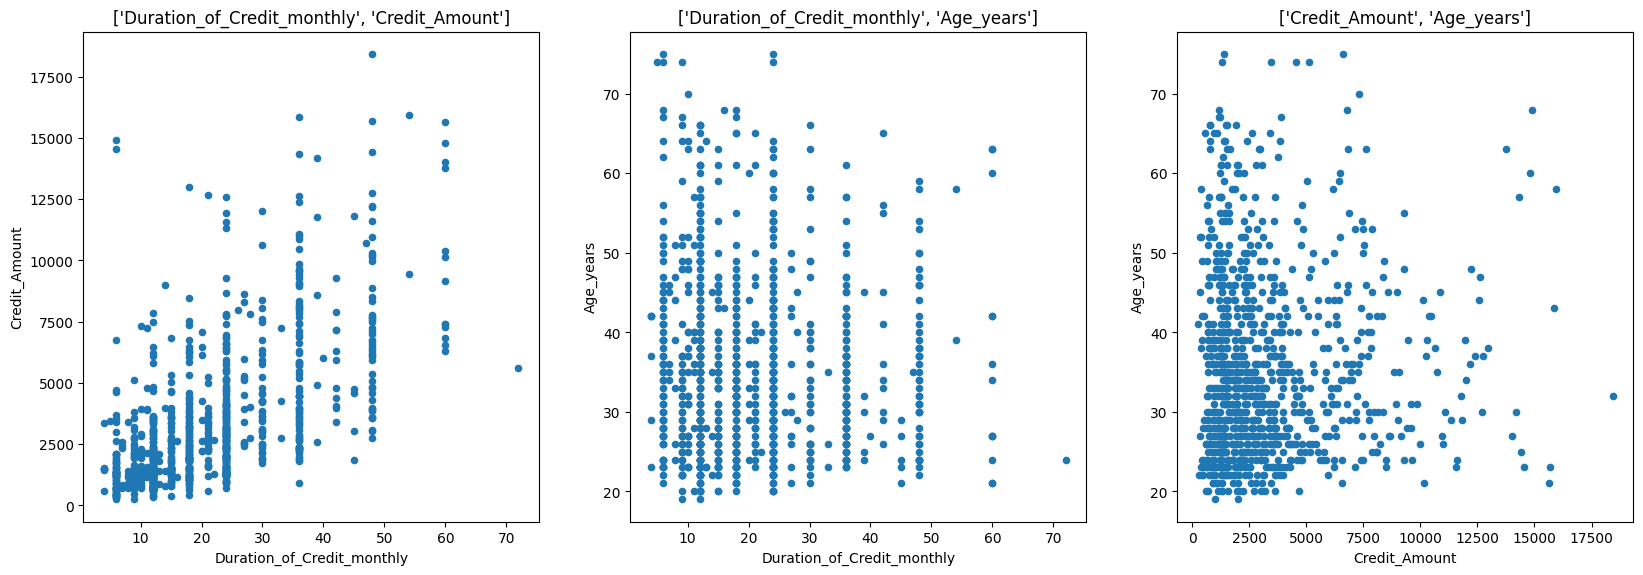

In [76]:
# plot
plt.figure(figsize=(20,5))

plot_column_list = [['Duration_of_Credit_monthly', 'Credit_Amount'], ['Duration_of_Credit_monthly', 'Age_years'], ['Credit_Amount', 'Age_years']]

x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for tmp_cols in plot_column_list:
    tmp_ax = plt.subplot(1,3,x)
    x += 1
    df[tmp_cols].plot.scatter(x=tmp_cols[0], y=tmp_cols[1], ax=tmp_ax)
    plt.title(str(tmp_cols))

plt.show()

Original shape: (1000, 3)
Reduced shape: (1000, 2)


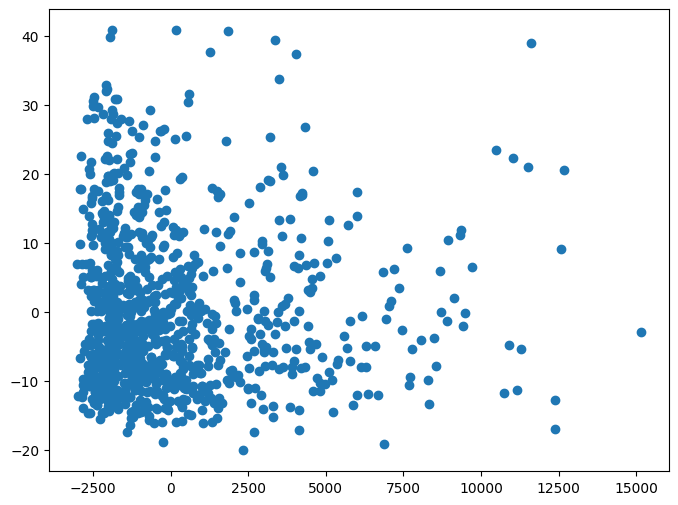

In [77]:
x_df = df[list_numeircal_column]

pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(np.array(x_df))
pca_df = pd.DataFrame(X_pca)

# 변환된 데이터의 형태를 확인
print("Original shape:", np.array(x_df).shape)
print("Reduced shape:", X_pca.shape)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df[0], pca_df[1])
plt.show()